# **Module de Machine Learning**

## **Objectif**
A termes, ce module de machine learning doit être capable d'aller récupérer les dernières actualités financières du site Financial Times puis, d'afficher ces nouvelles données et leurs sentiments associés.

## **Partie1**
Conception et entraînement d'un modèle de machine learning pour un problème de type régression ligistique (méthode choisie par l'équipe).

### Prérequis


*   Librairie python scikit-learn
*   Un dataset public du site Kaggle



### Librairies

In [1]:
# Importation des librairies nécessaires
import pandas as pan
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

### Récupération des données

In [2]:
# Récupération du dataset depuis google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Récupération du dataset
dataFrame = pan.read_csv("../data/data.csv")

### Visualisation des données

In [4]:
dataFrame

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


<Axes: >

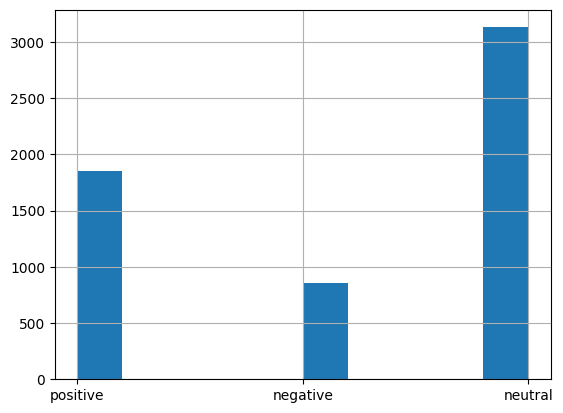

In [5]:
dataFrame.Sentiment.hist()

### Préparation du modèle

#### Définition des données à analyser (X : des phrases) et des résultats à trouver (y : des sentiments)

In [6]:
X = dataFrame.Sentence
y = dataFrame.Sentiment

#### Séparation des données d'entrainement et de test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Préparation des données en vue de l'entrainement

In [8]:
# Conversion des phrases à analyser en vecteurs
tfidf = TfidfVectorizer()
tfidf.fit(X_train)

TfidfVectorizer()

In [9]:
# Rassemblement des vecteurs dans une matrice
X_matrice = tfidf.transform(X_train)
X_matrice_test = tfidf.transform(X_test)

### Entrainement du modèle LR

In [10]:
# Définition du modèle
lr = LogisticRegression()

In [11]:
# Entrainement du modèle avec nos phrases converties en vecteurs et rassemblées dans une matrice en paramètre.
lr.fit(X_matrice, y_train)

LogisticRegression()

### Test du modèle

#### Visualisation des données de test

In [12]:
# Phrases de test
X_test

4584    A few employees would remain at the Oulu plant...
177     Comparable net sales are expected to increase ...
167     Tesla is recalling 2,700 Model X cars: https:/...
5585    Finnish software developer Done Solutions Oyj ...
2339    Compagnie de Financement Foncier - Is to issue...
                              ...                        
2232    In 2010 , the Marimekko Group s net sales were...
2329    Nokia said it still expects to sell 150 more m...
5028    PNC, Goldman Sachs Receive Dividend Hike Green...
1175    The company , employing 6,400 , reported net s...
5519    To see more of New Haven Register , or to subs...
Name: Sentence, Length: 1169, dtype: object

In [13]:
# Sentiments des phrases de test
y_test

4584     neutral
177     positive
167     negative
5585    positive
2339     neutral
          ...   
2232     neutral
2329     neutral
5028    positive
1175     neutral
5519     neutral
Name: Sentiment, Length: 1169, dtype: object

#### Test

In [14]:
y_test_pred = lr.predict(X_matrice_test)

#### Analyse des résultats

In [15]:
print(classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

    negative      0.490     0.143     0.221       175
     neutral      0.708     0.899     0.792       622
    positive      0.766     0.677     0.719       372

    accuracy                          0.715      1169
   macro avg      0.655     0.573     0.578      1169
weighted avg      0.694     0.715     0.684      1169



D'après ce qu'on peut constater ci-dessus, le modèle actuel manque de précision et fait beaucoup d'erreurs de prédiction. Celui-ci devrait donc être réentrainé sur plus de données.

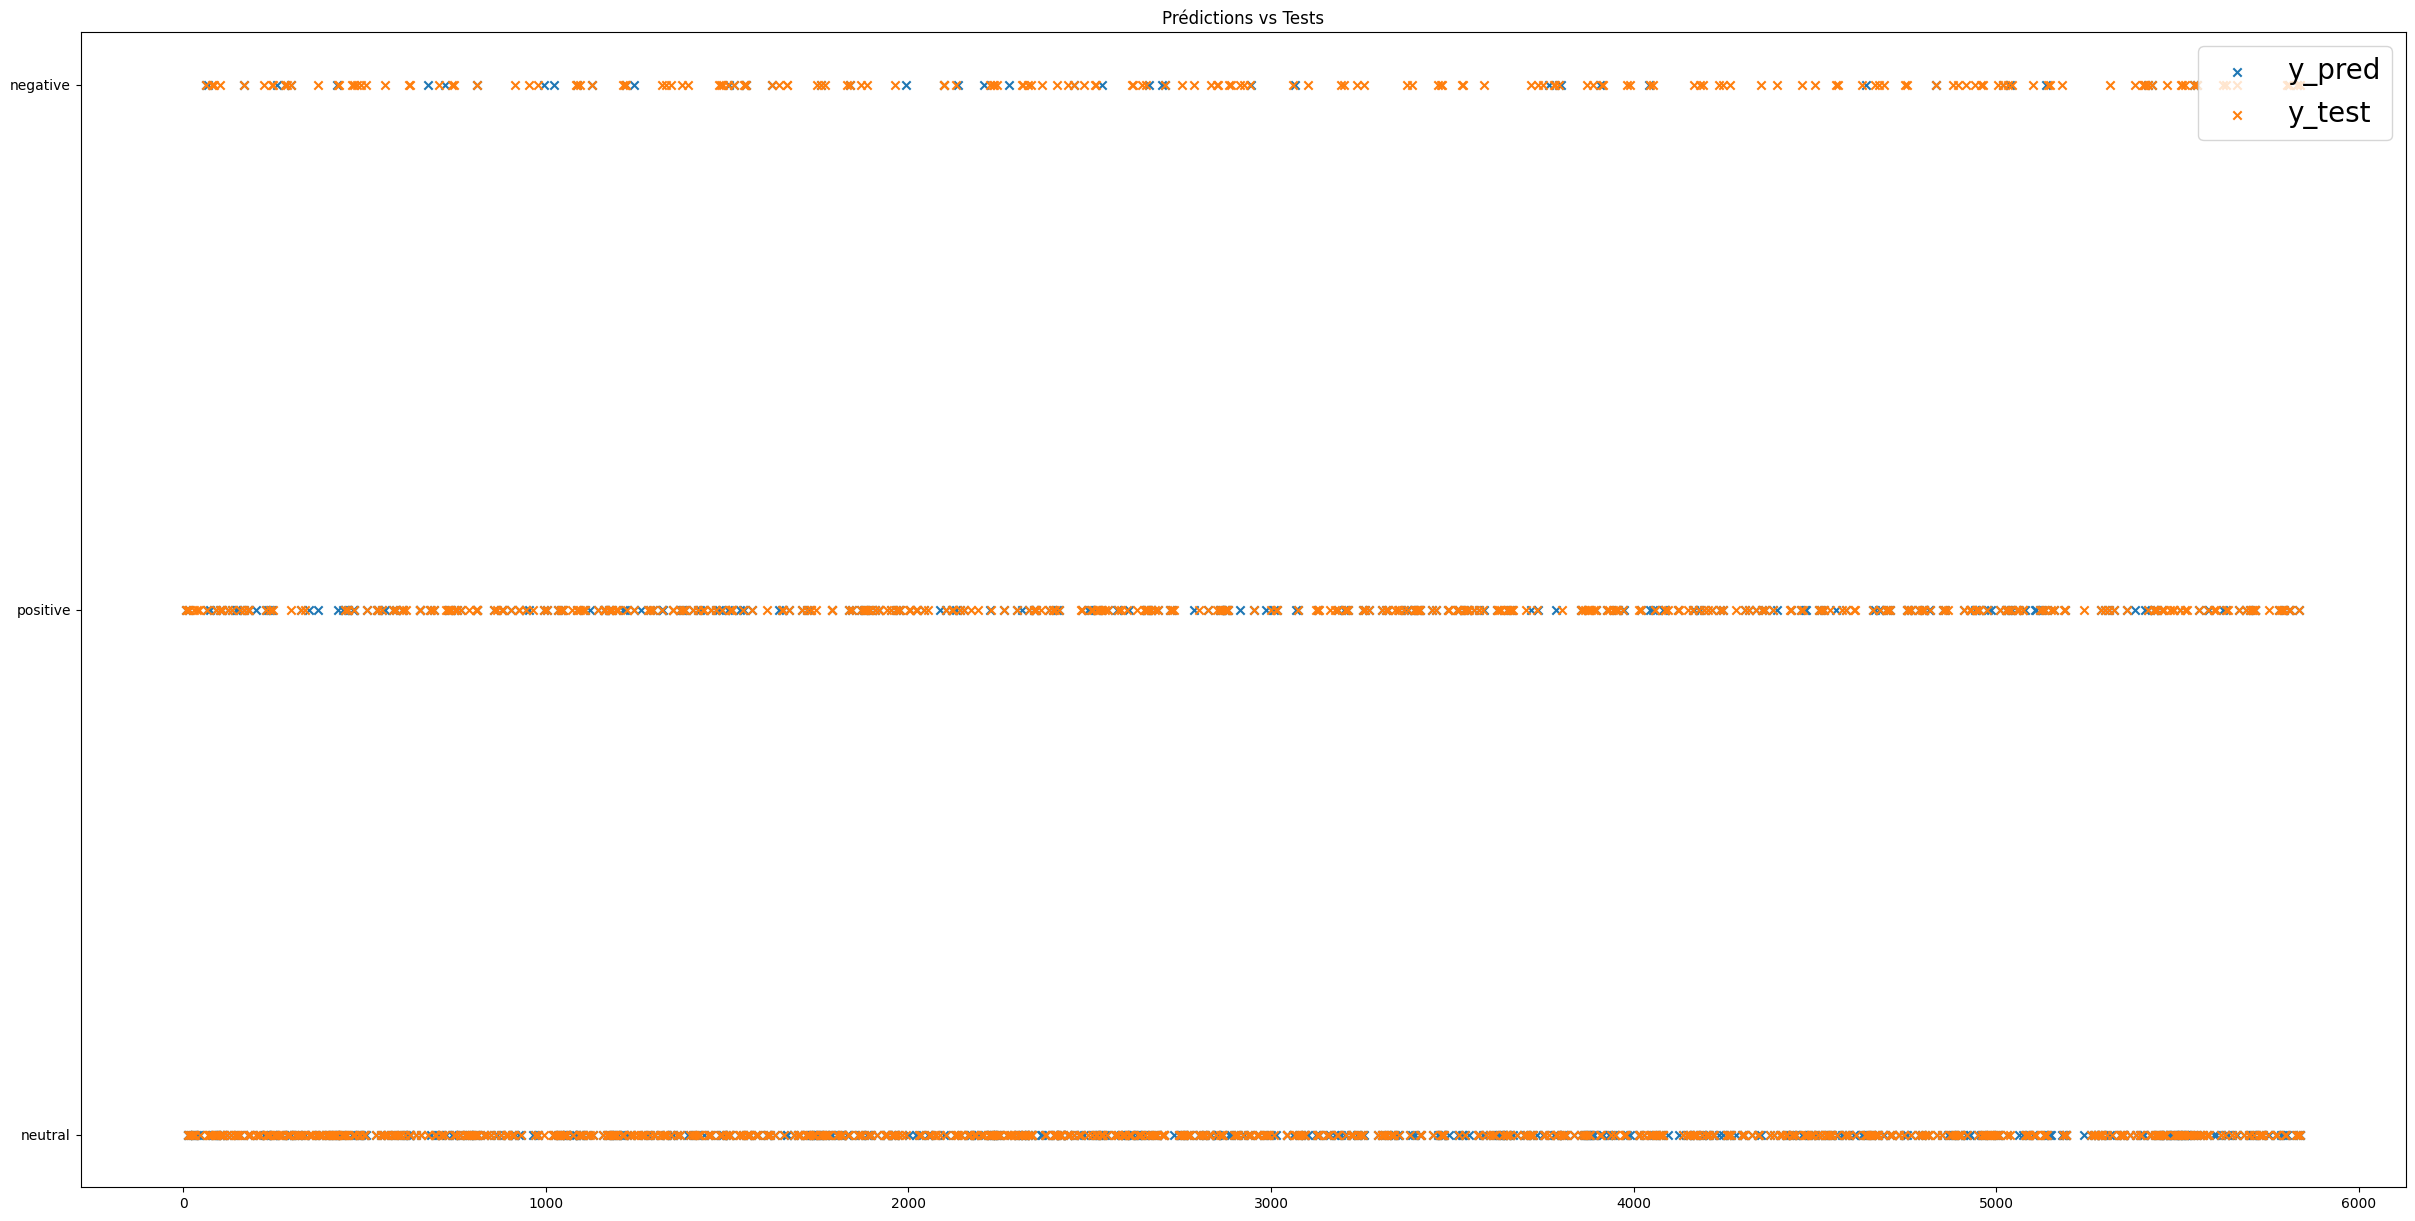

In [16]:
plt.figure(figsize=(30,15))

plt.scatter(X_test.index, y_test_pred, marker="x", label="y_pred")
plt.scatter(X_test.index, y_test, marker="x", label="y_test")
plt.legend(fontsize=20)
plt.title("Prédictions vs Tests")

plt.show()

### Sauvegarde du modèle

In [17]:
from joblib import dump
dump(lr, 'model.LogiR')

['model.LogiR']

### Réentrainement du modèle

In [18]:
dataFrame2 = pan.read_csv("../data/dataset2/file.csv")

In [19]:
dataFrame2.drop(columns=["id"])

,tweets,sentiment
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,bad
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,chatgpt is being disassembled until it can onl...,bad
219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [20]:
# dataFrame2 = dataFrame2.sentiment.replace("good", "positif")
dataFrame2 = dataFrame2.sentiment.replace("bad", "negative")

In [21]:
dataFrame2

0          neutral
1             good
2          neutral
3             good
4         negative
            ...   
219289    negative
219290        good
219291    negative
219292    negative
219293     neutral
Name: sentiment, Length: 219294, dtype: object